# MC855 - Data analysis pyspark

## Initializing spark and data
 - Spark version 2.2.0
 - Change /home/henrique/Downloads/spark to the path you downloaded and extracted spark
 - You may need to export hadoop bin to your path before running jupyter notebook 
   - `export PATH=$PATH:/Users/hadoop/hadoop/bin`

In [1]:
# Import findspark 
import findspark

# Initialize and provide path
findspark.init("/home/henrique/Downloads/spark")

# Or use this alternative
#findspark.init()

In [2]:
# Import SparkSession
from pyspark.sql import SparkSession

# Build the SparkSession
spark = SparkSession.builder \
       .master("local") \
       .appName("Linear Regression Model") \
       .config("spark.executor.memory", "1gb") \
       .getOrCreate()
   
sc = spark.sparkContext

In [3]:
# Deprecated - Using direct load from CSV to df
#file = sc.textFile("games.csv")
#header = file.first()                           #extract header
#data = file.filter(lambda row: row != header)   #filter out header

## Trying to load directly from the csv
if this is working, the last frame is not needed anymore

In [4]:
import pyspark
sql = pyspark.sql.SQLContext(sc)

df = (sql.read
         .format("com.databricks.spark.csv")  # Choose the bib to oad csv
         .option("header", "true")            # Use the first line as header
         .option("inferSchema", "true")       # Try to infer data type - if this is not set all the typer will be str
         .load("games.csv"))                  # File name

In [5]:
df

DataFrame[gameId: bigint, gameDuration: int, seasonId: int, winner: int, firstBlood: int, firstTower: int, firstInhibitor: int, firstBaron: int, firstDragon: int, firstRiftHerald: int, t1_champ1id: int, t1_champ1_sum1: int, t1_champ1_sum2: int, t1_champ2id: int, t1_champ2_sum1: int, t1_champ2_sum2: int, t1_champ3id: int, t1_champ3_sum1: int, t1_champ3_sum2: int, t1_champ4id: int, t1_champ4_sum1: int, t1_champ4_sum2: int, t1_champ5id: int, t1_champ5_sum1: int, t1_champ5_sum2: int, t1_towerKills: int, t1_inhibitorKills: int, t1_baronKills: int, t1_dragonKills: int, t1_riftHeraldKills: int, t1_ban1: int, t1_ban2: int, t1_ban3: int, t1_ban4: int, t1_ban5: int, t2_champ1id: int, t2_champ1_sum1: int, t2_champ1_sum2: int, t2_champ2id: int, t2_champ2_sum1: int, t2_champ2_sum2: int, t2_champ3id: int, t2_champ3_sum1: int, t2_champ3_sum2: int, t2_champ4id: int, t2_champ4_sum1: int, t2_champ4_sum2: int, t2_champ5id: int, t2_champ5_sum1: int, t2_champ5_sum2: int, t2_towerKills: int, t2_inhibitorKil

### Just checking if data is Ok
will print the first three lines of file and the last two of then must be equal to data

In [6]:
#file.take(3)

In [7]:
#data.take(2)

### Spliting each element of the data list and turning each line in a list...

In [8]:
#file = file.map(lambda line: line.split(","))

### Defining the header of the rdd and turning it into a DataFrame

In [9]:
# Map the RDD to a DF
#from pyspark.sql import Row

#df = file.map(lambda line: Row(gameId =                 line[0],
#                                gameDuration =          line[1],
#                                seasonId =              line[2],
#                                winner =                line[3],
#                                firstBlood =            line[4],
#                                firstTower =            line[5],
#                                firstInhibitor =        line[6],
#                                firstBaron =            line[7],
#                                firstDragon =           line[8],
#                                firstRiftHerald =       line[9],
#                                t1_champ1id =           line[10],
#                                t1_champ1_sum1 =        line[11],
#                                t1_champ1_sum2 =        line[12],
#                                t1_champ2id =           line[13],
#                                t1_champ2_sum1 =        line[14],
#                                t1_champ2_sum2 =        line[15],
#                                t1_champ3id =           line[16],
#                                t1_champ3_sum1 =        line[17],
#                                t1_champ3_sum2 =        line[18],
#                                t1_champ4id =           line[19],
#                                t1_champ4_sum1 =        line[20],
#                                t1_champ4_sum2 =        line[21],
#                                t1_champ5id =           line[22],
#                                t1_champ5_sum1 =        line[23],
#                                t1_champ5_sum2 =        line[24],
#                                t1_towerKills =         line[25],
#                                t1_inhibitorKills =     line[26],
#                                t1_baronKills =         line[27],
#                                t1_dragonKills =        line[28],
#                                t1_riftHeraldKills =    line[29],
#                                t1_ban1 =               line[30],
#                                t1_ban2 =               line[31],
#                                t1_ban3 =               line[32],
#                                t1_ban4 =               line[33],
#                                t1_ban5 =               line[34],
#                                t2_champ1id =           line[35],
#                                t2_champ1_sum1 =        line[36],
#                                t2_champ1_sum2 =        line[37],
#                                t2_champ2id =           line[38],
#                                t2_champ2_sum1 =        line[39],
#                                t2_champ2_sum2 =        line[40],
#                                t2_champ3id =           line[41],
#                                t2_champ3_sum1 =        line[42],
#                                t2_champ3_sum2 =        line[43],
#                                t2_champ4id =           line[44],
#                                t2_champ4_sum1 =        line[45],
#                                t2_champ4_sum2 =        line[46],
#                                t2_champ5id =           line[47],
#                                t2_champ5_sum1 =        line[48],
#                                t2_champ5_sum2 =        line[49],
#                                t2_towerKills =         line[50],
#                                t2_inhibitorKills =     line[51],
#                                t2_baronKills =         line[52],
#                                t2_dragonKills =        line[53],
#                                t2_riftHeraldKills =    line[54],
#                                t2_ban1 =               line[55],
#                                t2_ban2 =               line[56],
#                                t2_ban3 =               line[57],
#                                t2_ban4 =               line[58],
#                                t2_ban5 =               line[59])).toDF()

In [10]:
#df.show()

### Excluding rows that are not needed

In [11]:
excludes = [
 't1_ban1',
 't1_ban2',
 't1_ban3',
 't1_ban4',
 't1_ban5',
 't1_champ1_sum1',
 't1_champ1_sum2',
 't1_champ1id',
 't1_champ2_sum1',
 't1_champ2_sum2',
 't1_champ2id',
 't1_champ3_sum1',
 't1_champ3_sum2',
 't1_champ3id',
 't1_champ4_sum1',
 't1_champ4_sum2',
 't1_champ4id',
 't1_champ5_sum1',
 't1_champ5_sum2',
 't1_champ5id',
 't2_ban1',
 't2_ban2',
 't2_ban3',
 't2_ban4',
 't2_ban5',
 't2_champ1_sum1',
 't2_champ1_sum2',
 't2_champ1id',
 't2_champ2_sum1',
 't2_champ2_sum2',
 't2_champ2id',
 't2_champ3_sum1',
 't2_champ3_sum2',
 't2_champ3id',
 't2_champ4_sum1',
 't2_champ4_sum2',
 't2_champ4id',
 't2_champ5_sum1',
 't2_champ5_sum2',
 't2_champ5id']

In [12]:
for exclude in excludes:
    df = df.drop(exclude)

In [13]:
df.columns

['gameId',
 'gameDuration',
 'seasonId',
 'winner',
 'firstBlood',
 'firstTower',
 'firstInhibitor',
 'firstBaron',
 'firstDragon',
 'firstRiftHerald',
 't1_towerKills',
 't1_inhibitorKills',
 't1_baronKills',
 't1_dragonKills',
 't1_riftHeraldKills',
 't2_towerKills',
 't2_inhibitorKills',
 't2_baronKills',
 't2_dragonKills',
 't2_riftHeraldKills']

### Now we need to define each row type

In [14]:
# DEPRECATED - AS We're importing it directly from CSV
# Import all from `sql.types`
#from pyspark.sql.types import *

# Write a custom function to convert the data type of DataFrame columns
#def convertColumn(df, names, newType):
#  for name in names: 
#     df = df.withColumn(name, df[name].cast(newType))
#  return df 

# Assign all column names to `columns`

# Conver the `df` columns to `FloatType()`
#df = convertColumn(df, columns, IntegerType())

#df = df.select("medianHouseValue", 
#              "totalBedRooms", 
#              "population", 
#              "households", 
#              "medianIncome", 
#              "roomsPerHousehold", 
#              "populationPerHousehold", 
#              "bedroomsPerRoom")

In [15]:
df.printSchema()

root
 |-- gameId: long (nullable = true)
 |-- gameDuration: integer (nullable = true)
 |-- seasonId: integer (nullable = true)
 |-- winner: integer (nullable = true)
 |-- firstBlood: integer (nullable = true)
 |-- firstTower: integer (nullable = true)
 |-- firstInhibitor: integer (nullable = true)
 |-- firstBaron: integer (nullable = true)
 |-- firstDragon: integer (nullable = true)
 |-- firstRiftHerald: integer (nullable = true)
 |-- t1_towerKills: integer (nullable = true)
 |-- t1_inhibitorKills: integer (nullable = true)
 |-- t1_baronKills: integer (nullable = true)
 |-- t1_dragonKills: integer (nullable = true)
 |-- t1_riftHeraldKills: integer (nullable = true)
 |-- t2_towerKills: integer (nullable = true)
 |-- t2_inhibitorKills: integer (nullable = true)
 |-- t2_baronKills: integer (nullable = true)
 |-- t2_dragonKills: integer (nullable = true)
 |-- t2_riftHeraldKills: integer (nullable = true)



In [16]:
df.dtypes

[('gameId', 'bigint'),
 ('gameDuration', 'int'),
 ('seasonId', 'int'),
 ('winner', 'int'),
 ('firstBlood', 'int'),
 ('firstTower', 'int'),
 ('firstInhibitor', 'int'),
 ('firstBaron', 'int'),
 ('firstDragon', 'int'),
 ('firstRiftHerald', 'int'),
 ('t1_towerKills', 'int'),
 ('t1_inhibitorKills', 'int'),
 ('t1_baronKills', 'int'),
 ('t1_dragonKills', 'int'),
 ('t1_riftHeraldKills', 'int'),
 ('t2_towerKills', 'int'),
 ('t2_inhibitorKills', 'int'),
 ('t2_baronKills', 'int'),
 ('t2_dragonKills', 'int'),
 ('t2_riftHeraldKills', 'int')]

In [17]:
df.select('gameId','t1_inhibitorKills','t2_towerKills','winner').show(15)

+----------+-----------------+-------------+------+
|    gameId|t1_inhibitorKills|t2_towerKills|winner|
+----------+-----------------+-------------+------+
|3326086514|                1|            5|     0|
|3229566029|                4|            2|     0|
|3327363504|                1|            2|     0|
|3326856598|                2|            0|     0|
|3330080762|                2|            3|     0|
|3287435705|                1|            6|     0|
|3314215542|                2|            2|     0|
|3329224025|                0|            0|     0|
|3318040883|                0|            8|     1|
|3327786881|                1|            8|     1|
|3325996400|                0|           10|     1|
|3284613292|                1|            2|     0|
|3321570535|                0|            3|     0|
|3323144943|                1|            3|     0|
|3329332855|                1|            9|     1|
+----------+-----------------+-------------+------+
only showing

## Now, we need to start using MLlib - spark ml library

 - https://spark.apache.org/docs/2.2.0/ml-classification-regression.html#logistic-regression
 - http://people.duke.edu/~ccc14/sta-663-2016/21D_Spark_MLib.html
 - https://docs.databricks.com/spark/latest/mllib/binary-classification-mllib-pipelines.html
 - https://www.datacamp.com/community/tutorials/apache-spark-tutorial-machine-learning#gs.fip6MdA
 - https://wesslen.github.io/twitter/predicting_twitter_profile_location_with_pyspark/

In [18]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import PCA
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression


from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.clustering import GaussianMixture
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel

### Separating features from target
Features are the variables we are gonna use to predict the target variable

In [19]:
df = df.withColumnRenamed("winner","label")
df.printSchema()

root
 |-- gameId: long (nullable = true)
 |-- gameDuration: integer (nullable = true)
 |-- seasonId: integer (nullable = true)
 |-- label: integer (nullable = true)
 |-- firstBlood: integer (nullable = true)
 |-- firstTower: integer (nullable = true)
 |-- firstInhibitor: integer (nullable = true)
 |-- firstBaron: integer (nullable = true)
 |-- firstDragon: integer (nullable = true)
 |-- firstRiftHerald: integer (nullable = true)
 |-- t1_towerKills: integer (nullable = true)
 |-- t1_inhibitorKills: integer (nullable = true)
 |-- t1_baronKills: integer (nullable = true)
 |-- t1_dragonKills: integer (nullable = true)
 |-- t1_riftHeraldKills: integer (nullable = true)
 |-- t2_towerKills: integer (nullable = true)
 |-- t2_inhibitorKills: integer (nullable = true)
 |-- t2_baronKills: integer (nullable = true)
 |-- t2_dragonKills: integer (nullable = true)
 |-- t2_riftHeraldKills: integer (nullable = true)



### This are the data we're gonna use to predict

In [20]:
input_data = ['gameDuration',
              'seasonId', 
              'firstBlood', 
              'firstTower', 
              'firstInhibitor', 
              'firstBaron', 
              'firstDragon', 
              'firstRiftHerald', 
              't1_towerKills', 
              't1_inhibitorKills', 
              't2_baronKills',
              't1_dragonKills', 
              't1_riftHeraldKills', 
              't2_towerKills', 
              't2_inhibitorKills',
              't2_baronKills',
              't2_dragonKills', 
              't2_riftHeraldKills']

In [21]:
assembler = VectorAssembler(inputCols=input_data, outputCol="features")
output = assembler.transform(df)

In [22]:
output['features']

Column<b'features'>

In [23]:
(trainingData, testData) = output.randomSplit([0.8, 0.2], seed = 1234)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 41165
Test Dataset Count: 10371


In [24]:
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0.8, family = "binomial")
lrModel = lr.fit(trainingData)

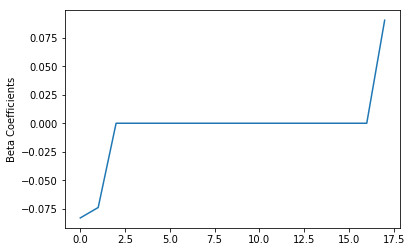

In [25]:
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

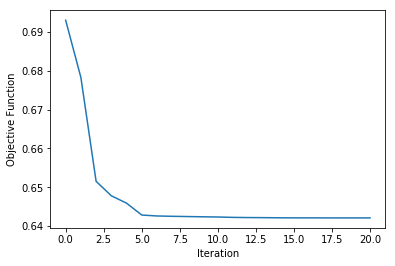

In [26]:
trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
plt.plot(objectiveHistory)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.show()

areaUnderROC: 0.9934218599004339


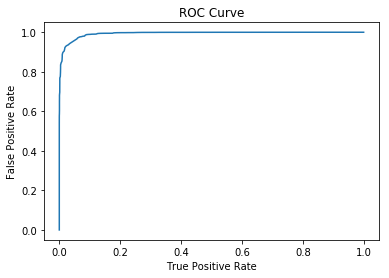

In [27]:
# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

#trainingSummary.roc.show(n=10, truncate=15)
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

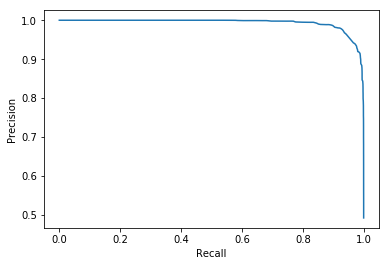

In [28]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [29]:
predictions = lrModel.transform(testData)

In [30]:
predictions.select("label","prediction","probability")\
           .show(n=10, truncate=40)

+-----+----------+----------------------------------------+
|label|prediction|                             probability|
+-----+----------+----------------------------------------+
|    1|       1.0| [0.3112133993451116,0.6887866006548884]|
|    0|       0.0| [0.6388510591825755,0.3611489408174245]|
|    0|       0.0|  [0.575999674094577,0.4240003259054231]|
|    0|       0.0|[0.6627150496407138,0.33728495035928613]|
|    1|       1.0| [0.3495811877722081,0.6504188122277919]|
|    1|       1.0|[0.36701483742035346,0.6329851625796467]|
|    0|       0.0| [0.6088430112827148,0.3911569887172852]|
|    0|       0.0| [0.6371650903154406,0.3628349096845595]|
|    0|       1.0|[0.49391812431174453,0.5060818756882555]|
|    1|       1.0| [0.3276976662002996,0.6723023337997004]|
+-----+----------+----------------------------------------+
only showing top 10 rows



In [31]:
print("Number of correct prediction: " + str(predictions.filter(predictions['prediction'] == predictions['label']).count()))
print("Total of elements: " + str(testData.count()))

Number of correct prediction: 9921
Total of elements: 10371


In [32]:
predictions.filter(predictions['prediction'] == predictions['label'])\
           .select("gameId","probability","label","prediction").show(20)

+----------+--------------------+-----+----------+
|    gameId|         probability|label|prediction|
+----------+--------------------+-----+----------+
|3214824413|[0.31121339934511...|    1|       1.0|
|3214825708|[0.63885105918257...|    0|       0.0|
|3214843995|[0.57599967409457...|    0|       0.0|
|3215041408|[0.66271504964071...|    0|       0.0|
|3215114840|[0.34958118777220...|    1|       1.0|
|3215119997|[0.36701483742035...|    1|       1.0|
|3215149108|[0.60884301128271...|    0|       0.0|
|3215193866|[0.63716509031544...|    0|       0.0|
|3215297742|[0.32769766620029...|    1|       1.0|
|3215303507|[0.67945164498512...|    0|       0.0|
|3215451229|[0.69882080890096...|    0|       0.0|
|3215522891|[0.56681779514219...|    0|       0.0|
|3215573210|[0.68103948488371...|    0|       0.0|
|3215576990|[0.62289281128896...|    0|       0.0|
|3215584595|[0.71750619654263...|    0|       0.0|
|3215653188|[0.69728214155553...|    0|       0.0|
|3215659502|[0.41171682428018..

In [33]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
print("Training: Area Under ROC: " + str(trainingSummary.areaUnderROC))

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Training: Area Under ROC: 0.9934218599004339
Test: Area Under ROC: 0.9942406087179659
